In [1]:
import sys,os

import pyglet
pyglet.options['shadow_window'] = True

import pyrender#to display mesh
import numpy as np
import trimesh#to load mesh

import matplotlib
import matplotlib.pyplot as plt
import igl

from sklearn.neighbors import KDTree
from ICP_functions import *

%load_ext autoreload
%autoreload 2

In [2]:
def subsample(Q,rate):
    
    sample_indices = np.random.choice(Q.shape[0], int(rate*Q.shape[0]), replace=False)
    Q_sample = Q[sample_indices,:]
    
    return Q_sample

In [3]:
#Make obj files for each model.
obj_filenames=['bunny_v2/bun000_v2.obj','bunny_v2/bun045_v2.obj']
make_obj_test_files(obj_filenames)
n_models=len(obj_filenames)

In [4]:
#Render each model as a pointcloud.
colors=[(0.0,0.0,1.0),(0.0,1.0,0.0)]
file_paths=['M1.obj','M2.obj']
tms=[]
mesh_rds=[]
for i in range(n_models):
    fp=file_paths[i]
    tm = trimesh.load_mesh(fp)#load mesh
    surface_points = tm.sample(20000)#sample points for a point cloud
    mesh_rd = pyrender.Mesh.from_points(surface_points, colors[i])#make a point cloud object
    tms.append(tm)
    mesh_rds.append(mesh_rd)
    
show_mesh_gui(mesh_rds)#Display pointclouds.


In [19]:
best_rotation=
distance_between_rotations(R,R)


1.149463872304514

In [117]:
P, f_P = igl.read_triangle_mesh('M1.obj')
Q,f_Q=igl.read_triangle_mesh('M2.obj')
experiment_mses=[]
iterations_used=[]
rotations=[]
translations=[]
sample_rates=[]
n=14

M2_fp="M2.obj"
for i in range(0,n):
    rate = 2**(-i)
    sample_rates.append(rate)
    print('Processing for model with subsample rate '+str(rate)+'... ',end='')
    
    Q_subsample = subsample(Q,rate)
    R,t,mse_losses,iterations = ICP(P,Q_subsample,max_n=200,tol=1e-8)
    
    rotations.append(R)
    translations.append(t)
    experiment_mses.append(mse_losses)
    iterations_used.append(iterations)

Processing for model with subsample rate 1... ICP converged after 56 iterations.
Processing for model with subsample rate 0.5... ICP converged after 56 iterations.
Processing for model with subsample rate 0.25... ICP converged after 53 iterations.
Processing for model with subsample rate 0.125... ICP converged after 50 iterations.
Processing for model with subsample rate 0.0625... ICP converged after 43 iterations.
Processing for model with subsample rate 0.03125... ICP converged after 43 iterations.
Processing for model with subsample rate 0.015625... ICP converged after 40 iterations.
Processing for model with subsample rate 0.0078125... ICP converged after 48 iterations.
Processing for model with subsample rate 0.00390625... ICP converged after 45 iterations.
Processing for model with subsample rate 0.001953125... ICP converged after 41 iterations.
Processing for model with subsample rate 0.0009765625... ICP converged after 23 iterations.
Processing for model with subsample rate 0.0

In [65]:
#best_rotation=rotations[0]
#rotation_distances=[(distance_between_rotations(best_rotation,rotations[i])) for i in range(n)]
#plt.plot(np.log(sample_rates),rotation_distances)
#plt.gca().invert_xaxis()

/home/romy/Documents/CGVI/Geom Processing/COMP0119_20-21-main/course_work_1/ICP_functions.py:298: RuntimeWarning: invalid value encountered in arccos
  rotation_distances=[(distance_between_rotations(best_rotation,rotations[i])) for i in range(len(x_vals))]


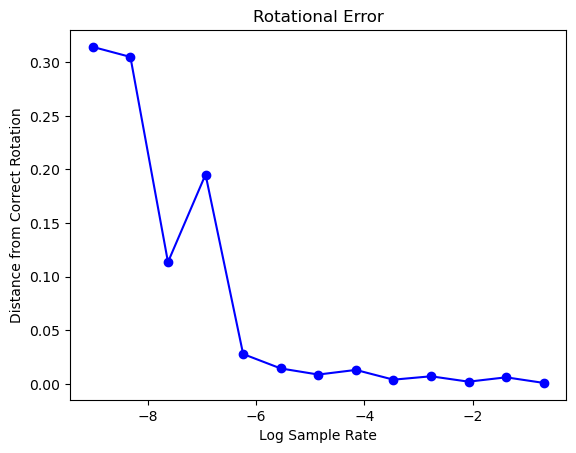

True

In [126]:
plot_rotational_error(rotations,best_rotation,sample_rates,'Log Sample Rate',invert=True,x_log=True)

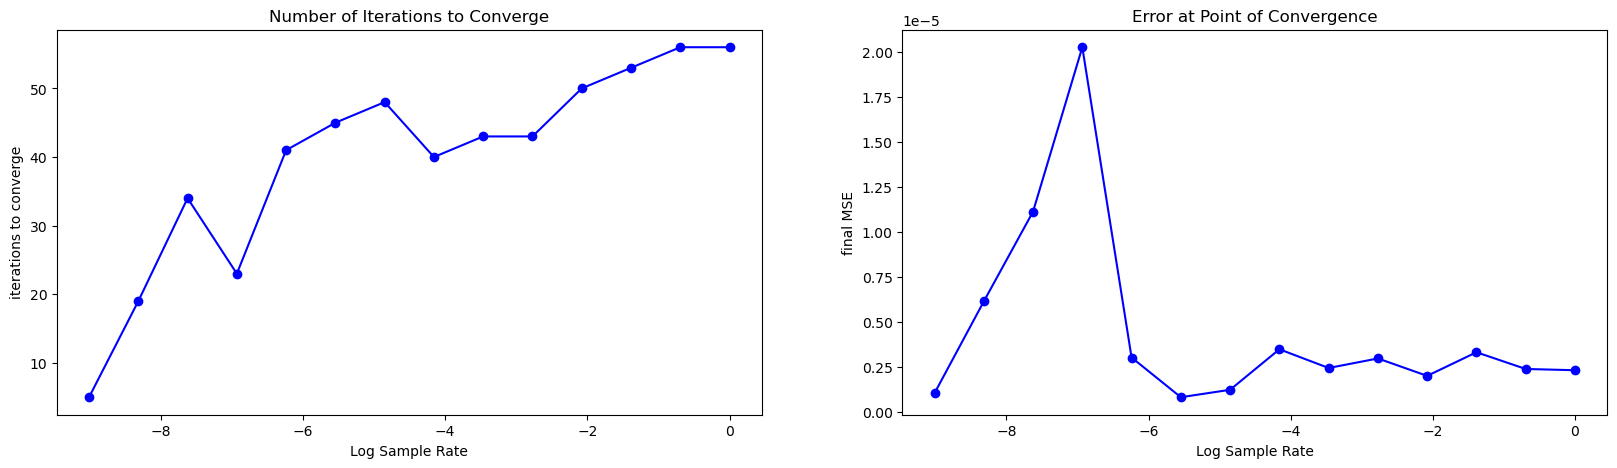

True

In [124]:

plot_summary_data(np.log(sample_rates),experiment_mses,iterations_used,'Log Sample Rate',invert=True,x_log=False)



In [114]:
print(experiment_mses[1])


[7.61071345290237e-05, 4.432289485381036e-05, 3.2809416064689284e-05, 2.5904268265474638e-05, 2.3319234708820503e-05, 2.24582098606721e-05, 2.1860387932270035e-05, 2.1436756510070922e-05, 2.086315622468511e-05, 2.047815408983855e-05, 2.02562487643392e-05, 2.0167756757937685e-05, 1.9588968022676475e-05, 1.9389021877730815e-05, 1.9291198332049144e-05, 1.9279653738368906e-05, 1.9264893444671982e-05, 1.9264893444672e-05]
